In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamhardy/nigeria-inflation-rates")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\Administrator\.cache\kagglehub\datasets\iamhardy\nigeria-inflation-rates\versions\1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# allow inline plotting for Jupyter
%matplotlib inline


In [3]:
data= pd.read_csv(r"C:\Users\Administrator\.cache\kagglehub\datasets\iamhardy\nigeria-inflation-rates\versions\1\NigeriaInflationRates.csv")

In [4]:
data.head()

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    197 non-null    float64
 4   Production         197 non-null    float64
 5   Crude Oil Export   197 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


In [6]:
data.isna().sum()

Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      1
Production           1
Crude Oil Export     1
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64

In [7]:
data.columns


Index(['Year', 'Month', 'Inflation_Rate', 'Crude Oil Price', 'Production',
       'Crude Oil Export', 'CPI_Food', 'CPI_Energy', 'CPI_Health',
       'CPI_Transport', 'CPI_Communication', 'CPI_Education'],
      dtype='object')

In [8]:
# Combination of the Year and Month to create a datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

In [9]:
# Handle Missing Values
# We only have 1 null in oil columns. We'll use forward-fill to fill up 
data.fillna(method='ffill', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17048\2976882667.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [10]:
# Double check if all nulls are now handled
data.isnull().sum()

Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      0
Production           0
Crude Oil Export     0
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64

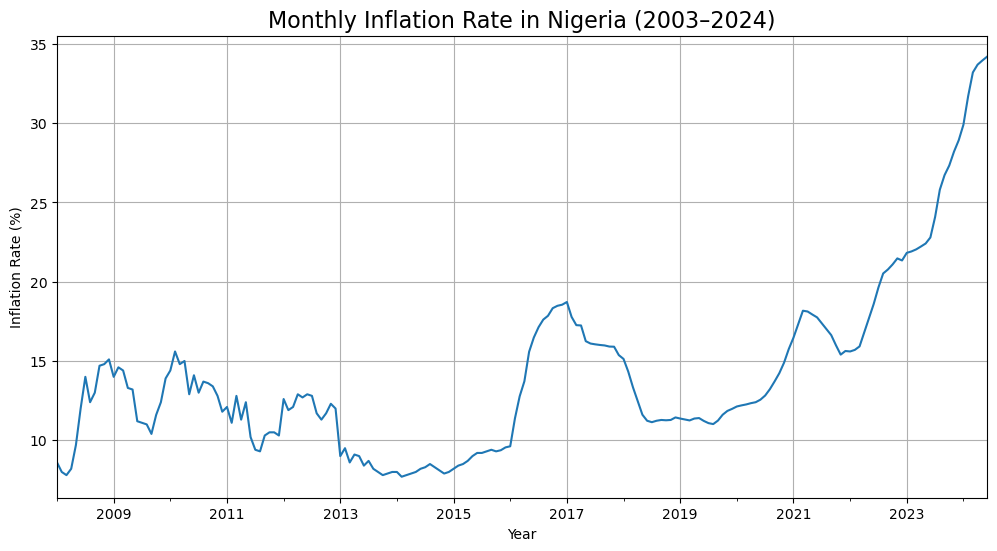

In [11]:
# Inflation Rate Over Time
plt.figure(figsize=(12, 6))
data['Inflation_Rate'].plot()
plt.title('Monthly Inflation Rate in Nigeria (2003–2024)', fontsize=16)
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

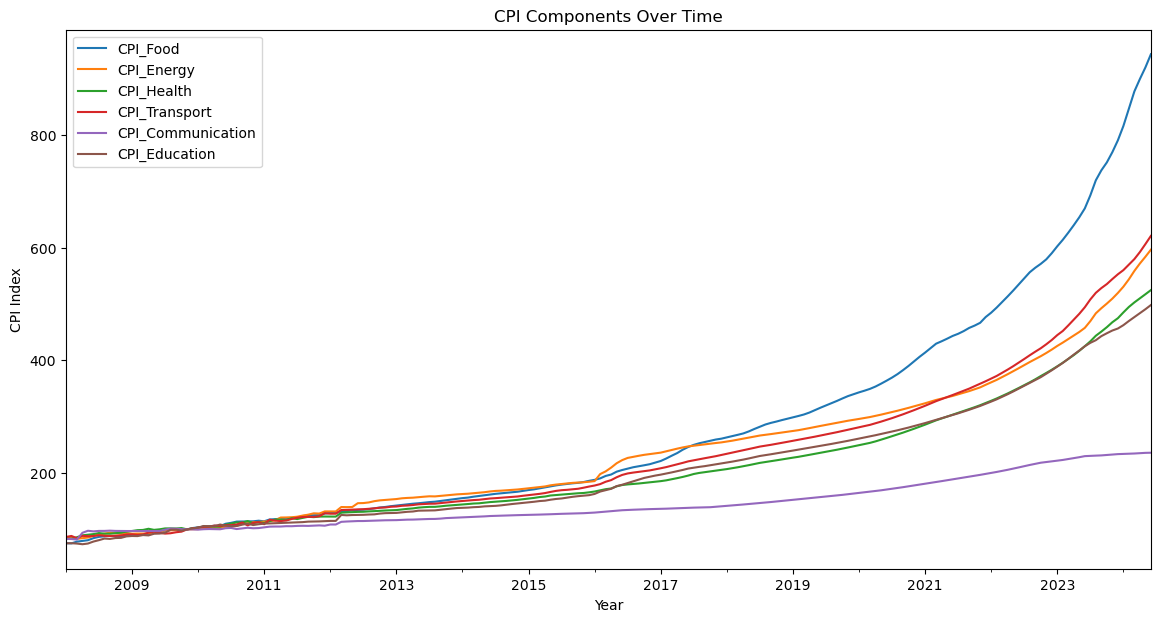

In [12]:
# Plot CPI Components
cpi_cols = ['CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport', 'CPI_Communication', 'CPI_Education']
data[cpi_cols].plot(figsize=(14, 7))
plt.title('CPI Components Over Time')
plt.ylabel('CPI Index')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()

In [13]:
# Correlation Matrix
# What’s Linked to Inflation?
corr = data[['Inflation_Rate', 'Crude Oil Price', 'Production', 'Crude Oil Export'] + cpi_cols].corr()

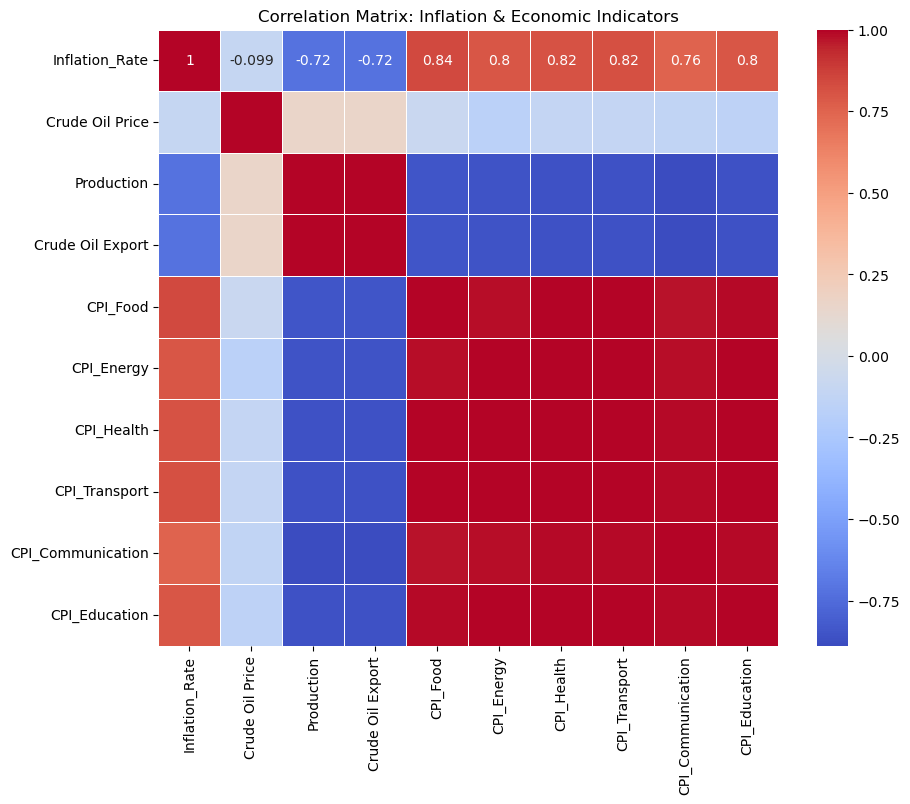

In [14]:
# Heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix: Inflation & Economic Indicators")
plt.show()

## Using Granger Causality Testing to determine which variables “cause” changes in inflation statistically
## Granger causality doesn't prove true causation, but it tests whether past values of one variable help predict another,like "Can CPI_food predict inflation_rate"

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests


In [16]:
# Selecting relevant variables for testing Granger causality
granger_df = data[['Inflation_Rate', 'CPI_Food', 'CPI_Energy', 'CPI_Health',
                 'CPI_Transport', 'CPI_Education', 'Production', 'Crude Oil Export']]

In [17]:
# confirm that there are no null values
granger_df = granger_df.dropna()

In [18]:
# Normalizing data for better performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(granger_df), 
                           columns=granger_df.columns, 
                           index=granger_df.index)

In [19]:
# Test for Granger causality at lag 1 to 6
max_lag = 6
target = 'Inflation_Rate'

In [20]:
for col in scaled_data.columns:
    if col == target:
        continue
    print(f"\n Granger Causality Test: {col} → {target}")
    result = grangercausalitytests(scaled_data[[target, col]], maxlag=max_lag, verbose=False)


 Granger Causality Test: CPI_Food → Inflation_Rate

 Granger Causality Test: CPI_Energy → Inflation_Rate

 Granger Causality Test: CPI_Health → Inflation_Rate

 Granger Causality Test: CPI_Transport → Inflation_Rate

 Granger Causality Test: CPI_Education → Inflation_Rate


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



 Granger Causality Test: Production → Inflation_Rate

 Granger Causality Test: Crude Oil Export → Inflation_Rate


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [21]:
for lag in range(1, max_lag + 1):
        p_val = result[lag][0]['ssr_ftest'][1]
        if p_val < 0.05:
            print(f" {col} Granger-causes {target} at lag {lag} (p = {p_val:.4f})")
        else:
            print(f" {col} does NOT Granger-cause {target} at lag {lag} (p = {p_val:.4f})")

 Crude Oil Export Granger-causes Inflation_Rate at lag 1 (p = 0.0134)
 Crude Oil Export does NOT Granger-cause Inflation_Rate at lag 2 (p = 0.0588)
 Crude Oil Export does NOT Granger-cause Inflation_Rate at lag 3 (p = 0.0789)
 Crude Oil Export does NOT Granger-cause Inflation_Rate at lag 4 (p = 0.1129)
 Crude Oil Export does NOT Granger-cause Inflation_Rate at lag 5 (p = 0.1090)
 Crude Oil Export Granger-causes Inflation_Rate at lag 6 (p = 0.0090)


In [22]:
from prophet import Prophet
# Prepare data for Forecasting Inflation Using Prophet
 
data_prophet = data[['Inflation_Rate']].copy()
data_prophet.reset_index(inplace=True)
data_prophet.columns = ['ds', 'y']  # Prophet requires these names
data_prophet.head()


,ds,y
0,2008-01-01,8.6
1,2008-02-01,8.0
2,2008-03-01,7.8
3,2008-04-01,8.2
4,2008-05-01,9.7


In [23]:
# Initialize Prophet model
model1 = Prophet()


In [24]:
# Fit the model to the data
model1.fit(data_prophet)

07:20:42 - cmdstanpy - INFO - Chain [1] start processing
07:20:43 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Create future DataFrame for prediction (12 months ahead)
future = model1.make_future_dataframe(periods=48, freq='M')

In [26]:
# Predict
forecast = model1.predict(future)

In [27]:
# Show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
241,2028-01-31,41.674174,38.063870,45.194185
242,2028-02-29,41.576095,37.890105,45.495945
243,2028-03-31,41.456613,37.833938,44.960236
244,2028-04-30,41.600505,37.601387,45.471370
245,2028-05-31,41.423832,37.489811,45.322183


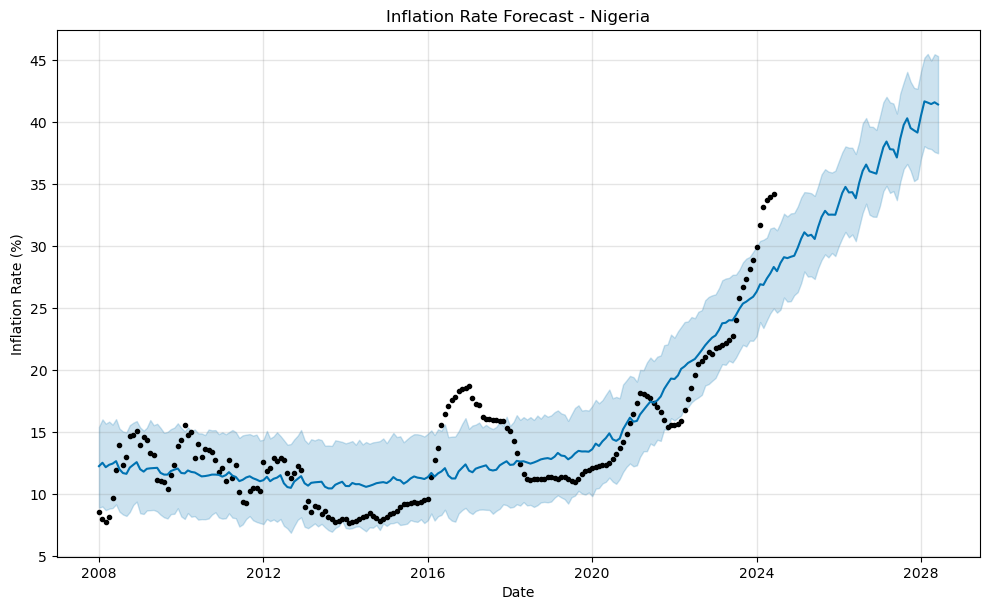

In [28]:
# Plot forecast
fig1 = model1.plot(forecast)
plt.title("Inflation Rate Forecast - Nigeria")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.show()

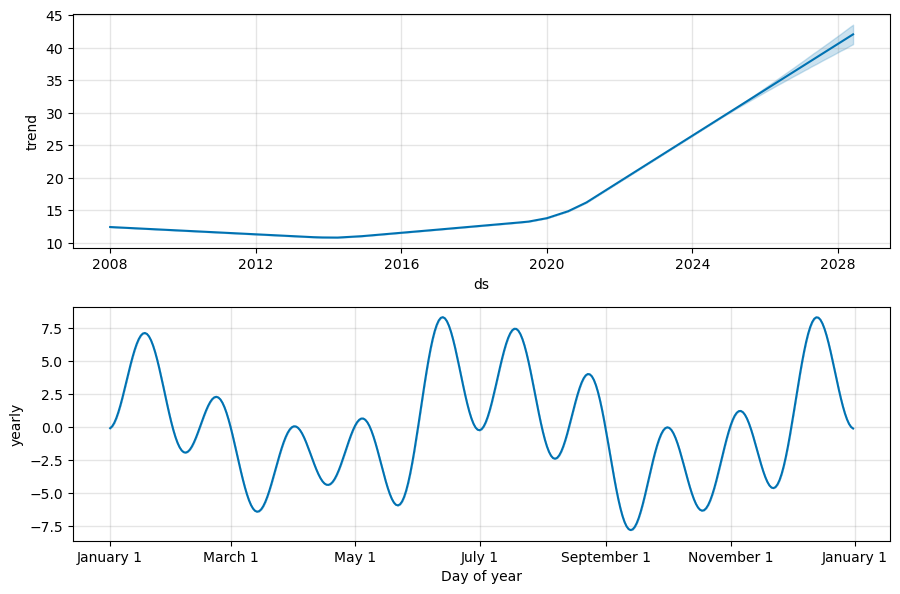

In [29]:
# Plot forecast components (trend & seasonality)
fig2 = model1.plot_components(forecast)
plt.show()

## Predict Crude Oil Price from your dataset into the next 5 years (till mid-2029) based on monthly historical data.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [31]:
# Remove rows with missing Crude Oil Price
ml_df = data.dropna(subset=['Crude Oil Price'])

In [32]:
# set index to get Year and Month
ml_df = ml_df.reset_index()

In [33]:
#  features and target
features = ['Inflation_Rate', 'Production', 'Crude Oil Export',
            'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport',
            'CPI_Communication', 'CPI_Education', 'Year', 'Month']

In [34]:
X = ml_df[features]
y = ml_df['Crude Oil Price']

In [35]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Initialize and train model
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model2.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# Predict on test set
y_pred = model2.predict(X_test)

In [38]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

 RMSE: 6.47
 R² Score: 0.94


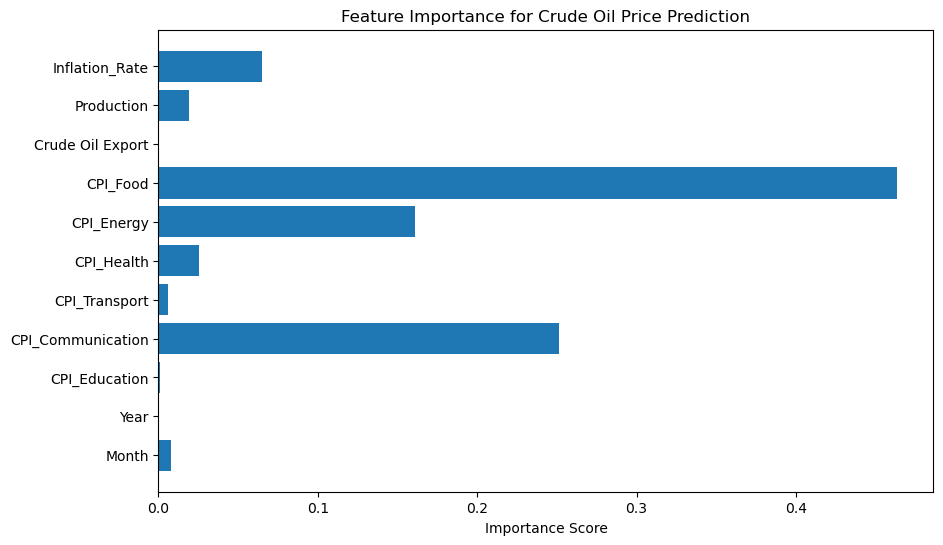

In [39]:
# Plot feature importance
importances = model2.feature_importances_
features_list = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features_list, importances)
plt.title("Feature Importance for Crude Oil Price Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [40]:
# Create future months between Jan 2026 and Dec 2029
future_dates = pd.date_range(start='2026-01-01', end='2029-12-01', freq='MS')

In [41]:
# Create future data template
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month
})

In [42]:
# Estimate or repeat average values for other features
feature_means = X.mean()

In [43]:
# average values for required features
for feature in features:
    if feature not in ['Year', 'Month']:
        future_df[feature] = feature_means[feature]

In [44]:
# Reorder columns to match model input
future_X = future_df[features]

In [45]:
# Predict oil prices for 2026–2029
future_preds = model2.predict(future_X)

In [46]:
# Add predictions to DataFrame
future_df['Predicted_Crude_Oil_Price'] = future_preds

In [47]:
# Combining future predictions with date for plotting
future_df['Date'] = pd.to_datetime(future_df[['Year', 'Month']].assign(DAY=1))

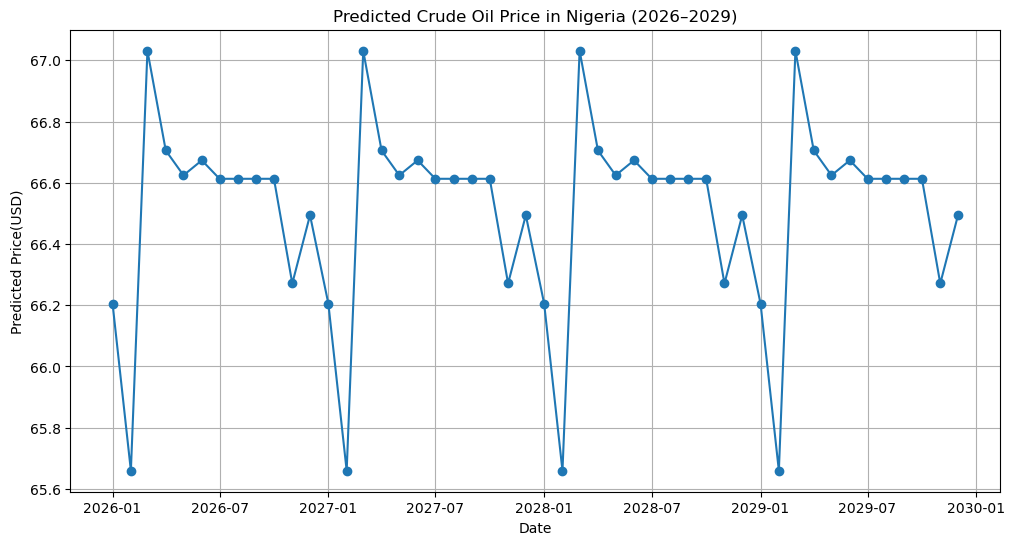

In [49]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(future_df['Date'], future_df['Predicted_Crude_Oil_Price'], marker='o')
plt.title("Predicted Crude Oil Price in Nigeria (2026–2029)")
plt.xlabel("Date")
plt.ylabel("Predicted Price(USD)")
plt.grid(True)
plt.show()